1° Teste: Pega a órbita elíptica real de um planeta, calcula uma aproximação dessa órbita usando série de Fourier e depois plota as duas curvas (a real e a aproximada) no gráfico para comparar

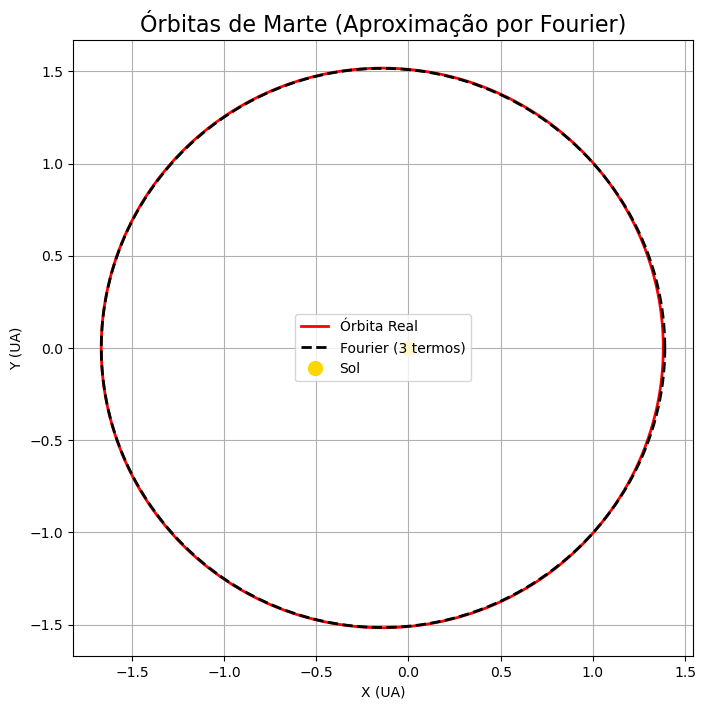

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros dos planetas
# Fonte: TCC - Tabela 1
planet_data = {
    'Marte': {
        'semi_major': 1.524,
        'ecc': 0.0934,
        'period': 686.98, # em dias
        'color': 'red'
    },
    'Vênus': {
        'semi_major': 0.723,
        'ecc': 0.0068,
        'period': 224.7, # em dias
        'color': 'orange'
    },
    'Mercúrio': {
        'semi_major': 0.387,
        'ecc': 0.2056,
        'period': 87.97, # em dias
        'color': 'gray'
    }
}

# 1. Cálculo da órbita elíptica real (referência)
def calculate_real_orbit(semi_major, ecc, num_points=1000):
    """Calcula as coordenadas x e y de uma órbita elíptica."""
    # O TCC usa equações de Kepler. Para simplificar, usamos a equação da elipse
    # polar, que é suficiente para demonstrar a aproximação.
    theta = np.linspace(0, 2 * np.pi, num_points)
    r = semi_major * (1 - ecc**2) / (1 + ecc * np.cos(theta))
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y, r

# 2. Cálculo dos coeficientes de Fourier (DFT discreta)
def calculate_fourier_coefficients(x_real, y_real, num_terms):
    """
    Calcula os coeficientes de Fourier a_n, b_n, c_n e d_n
    a partir das coordenadas da órbita real.
    """
    num_points = len(x_real)
    time = np.linspace(0, 2 * np.pi, num_points)

    a_n = np.zeros(num_terms + 1)
    b_n = np.zeros(num_terms + 1)
    c_n = np.zeros(num_terms + 1)
    d_n = np.zeros(num_terms + 1)

    # Coeficientes para n = 0 (média)
    a_n[0] = np.mean(x_real)
    c_n[0] = np.mean(y_real)

    # Coeficientes para n > 0
    for n in range(1, num_terms + 1):
        a_n[n] = (2 / num_points) * np.sum(x_real * np.cos(n * time))
        b_n[n] = (2 / num_points) * np.sum(x_real * np.sin(n * time))
        c_n[n] = (2 / num_points) * np.sum(y_real * np.cos(n * time))
        d_n[n] = (2 / num_points) * np.sum(y_real * np.sin(n * time))

    return a_n, b_n, c_n, d_n

# 3. Reconstrução da órbita usando a série de Fourier
def reconstruct_fourier_orbit(a_n, b_n, c_n, d_n, num_terms, num_points=1000):
    """Reconstrói a órbita usando os coeficientes de Fourier."""
    time = np.linspace(0, 2 * np.pi, num_points)
    x_fourier = a_n[0] * np.ones_like(time)
    y_fourier = c_n[0] * np.ones_like(time)

    for n in range(1, num_terms + 1):
        x_fourier += a_n[n] * np.cos(n * time) + b_n[n] * np.sin(n * time)
        y_fourier += c_n[n] * np.cos(n * time) + d_n[n] * np.sin(n * time)

    return x_fourier, y_fourier

# 4. Simulação e plotagem principal
def simulate_and_plot(planet_name, num_terms=3):
    """Função principal para simular e plotar as órbitas."""
    pdata = planet_data[planet_name]

    # Gerar a órbita real
    x_real, y_real, r_real = calculate_real_orbit(pdata['semi_major'], pdata['ecc'])

    # Calcular os coeficientes de Fourier a partir da órbita real
    a_n, b_n, c_n, d_n = calculate_fourier_coefficients(x_real, y_real, num_terms)

    # Reconstruir a órbita de Fourier
    x_fourier, y_fourier = reconstruct_fourier_orbit(a_n, b_n, c_n, d_n, num_terms)

    # Plotar as órbitas
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(x_real, y_real, label='Órbita Real', color=pdata['color'], linewidth=2)
    ax.plot(x_fourier, y_fourier, '--', label=f'Fourier ({num_terms} termos)', color='black', linewidth=2)
    ax.plot(0, 0, 'o', color='gold', markersize=10, label='Sol')

    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'Órbitas de {planet_name} (Aproximação por Fourier)', fontsize=16)
    ax.set_xlabel('X (UA)')
    ax.set_ylabel('Y (UA)')
    ax.legend()
    ax.grid(True)
    plt.show()

# Exemplo de uso
simulate_and_plot('Marte', num_terms=3)
 # aqui aumenta o número de termos

2° Teste: Faz a mesma coisa que o primeiro, mas com mais termos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros dos planetas
# Fonte: TCC - Tabela 1
planet_data = {
    'Marte': {
        'semi_major': 1.524,
        'ecc': 0.0934,
        'period': 686.98, # em dias
        'color': 'red'
    },
    'Vênus': {
        'semi_major': 0.723,
        'ecc': 0.0068,
        'period': 224.7, # em dias
        'color': 'orange'
    },
    'Mercúrio': {
        'semi_major': 0.387,
        'ecc': 0.2056,
        'period': 87.97, # em dias
        'color': 'gray'
    }
}

# 1. Cálculo da órbita elíptica real (referência)
def calculate_real_orbit(semi_major, ecc, num_points=1000):
    """Calcula as coordenadas x e y de uma órbita elíptica."""
    # O TCC usa equações de Kepler. Para simplificar, usamos a equação da elipse
    # polar, que é suficiente para demonstrar a aproximação.
    theta = np.linspace(0, 2 * np.pi, num_points)
    r = semi_major * (1 - ecc**2) / (1 + ecc * np.cos(theta))
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y, r

# 2. Cálculo dos coeficientes de Fourier (DFT discreta)
def calculate_fourier_coefficients(x_real, y_real, num_terms):
    """
    Calcula os coeficientes de Fourier a_n, b_n, c_n e d_n
    a partir das coordenadas da órbita real.
    """
    num_points = len(x_real)
    time = np.linspace(0, 2 * np.pi, num_points)

    a_n = np.zeros(num_terms + 1)
    b_n = np.zeros(num_terms + 1)
    c_n = np.zeros(num_terms + 1)
    d_n = np.zeros(num_terms + 1)

    # Coeficientes para n = 0 (média)
    a_n[0] = np.mean(x_real)
    c_n[0] = np.mean(y_real)

    # Coeficientes para n > 0
    for n in range(1, num_terms + 1):
        a_n[n] = (2 / num_points) * np.sum(x_real * np.cos(n * time))
        b_n[n] = (2 / num_points) * np.sum(x_real * np.sin(n * time))
        c_n[n] = (2 / num_points) * np.sum(y_real * np.cos(n * time))
        d_n[n] = (2 / num_points) * np.sum(y_real * np.sin(n * time))

    return a_n, b_n, c_n, d_n

# 3. Reconstrução da órbita usando a série de Fourier
def reconstruct_fourier_orbit(a_n, b_n, c_n, d_n, num_terms, num_points=1000):
    """Reconstrói a órbita usando os coeficientes de Fourier."""
    time = np.linspace(0, 2 * np.pi, num_points)
    x_fourier = a_n[0] * np.ones_like(time)
    y_fourier = c_n[0] * np.ones_like(time)

    for n in range(1, num_terms + 1):
        x_fourier += a_n[n] * np.cos(n * time) + b_n[n] * np.sin(n * time)
        y_fourier += c_n[n] * np.cos(n * time) + d_n[n] * np.sin(n * time)

    return x_fourier, y_fourier

# 4. Simulação e plotagem principal
def simulate_and_plot(planet_name, num_terms=3):
    """Função principal para simular e plotar as órbitas."""
    pdata = planet_data[planet_name]

    # Gerar a órbita real
    x_real, y_real, r_real = calculate_real_orbit(pdata['semi_major'], pdata['ecc'])

    # Calcular os coeficientes de Fourier a partir da órbita real
    a_n, b_n, c_n, d_n = calculate_fourier_coefficients(x_real, y_real, num_terms)

    # Reconstruir a órbita de Fourier
    x_fourier, y_fourier = reconstruct_fourier_orbit(a_n, b_n, c_n, d_n, num_terms)

    # Plotar as órbitas
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(x_real, y_real, label='Órbita Real', color=pdata['color'], linewidth=2)
    ax.plot(x_fourier, y_fourier, '--', label=f'Fourier ({num_terms} termos)', color='black', linewidth=2)
    ax.plot(0, 0, 'o', color='gold', markersize=10, label='Sol')

    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'Órbitas de {planet_name} (Aproximação por Fourier)', fontsize=16)
    ax.set_xlabel('X (UA)')
    ax.set_ylabel('Y (UA)')
    ax.legend()
    ax.grid(True)
    plt.show()

# Exemplo de uso
simulate_and_plot('Marte', num_terms=3)
 # aqui aumenta o número de termos